#### IMPORTING PACKAGES

In [1]:
import numpy as np   #for linear algebra
import pandas as pd  #for importing csv file and data manipulation
import seaborn as sns  #for plotting graphs
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import statsmodels.api as sm  #for building Logistic Regression model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split #to split the data
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,classification_report 


#### IMPORTING THE DATASET

In [2]:
data = pd.read_csv("Fraud Detection Dataset_Final1.csv")

#### EXPLORING FEATURES AND THEIR DATATYPES IN THE DATASET

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271068 entries, 0 to 271067
Data columns (total 11 columns):
step              271068 non-null int64
type              271068 non-null object
amount            271068 non-null float64
nameOrig          271068 non-null object
oldbalanceOrg     271068 non-null float64
newbalanceOrig    271068 non-null float64
nameDest          271068 non-null object
oldbalanceDest    271068 non-null float64
newbalanceDest    271068 non-null float64
isFraud           271068 non-null int64
isFlaggedFraud    271068 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 22.7+ MB


In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,CASH_OUT,614317.64,C2049348234,0.00,0.0,C1782113663,4541021.72,3997768.55,0,1
1,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,1
2,1,CASH_OUT,361980.67,C1290698656,0.00,0.0,C248609774,6057072.17,6453430.91,0,1
3,1,TRANSFER,235238.66,C1872047468,235238.66,0.0,C116289363,0.00,0.00,1,1
4,1,CASH_OUT,235238.66,C1499825229,235238.66,0.0,C2100440237,0.00,235238.66,1,1


In [5]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
271063,95,CASH_OUT,87999.25,C409531429,87999.25,0.0,C1827219533,0.00,87999.25,1,1
271064,95,TRANSFER,56745.14,C872526349,56745.14,0.0,C1824885183,0.00,0.00,1,1
271065,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1,1
271066,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1,0
271067,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1,0


#### LETS CHECK THE DIMENSIONS OF DATA

In [6]:
data.shape

(271068, 11)

#### DATAPREPROCESSING

#### CHECKING MISSING VALUES OF THE DATA

In [7]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### REMOVE IRRELEVANT OR UNIQUE IDENTIFIERS IN THE DATASET

In [8]:
data = data.drop(['nameOrig','nameDest'],axis=1)

In [9]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,CASH_OUT,614317.64,0.00,0.0,4541021.72,3997768.55,0,1
1,1,CASH_OUT,416001.33,0.00,0.0,102.00,9291619.62,1,1
2,1,CASH_OUT,361980.67,0.00,0.0,6057072.17,6453430.91,0,1
3,1,TRANSFER,235238.66,235238.66,0.0,0.00,0.00,1,1
4,1,CASH_OUT,235238.66,235238.66,0.0,0.00,235238.66,1,1


#### EXPLORING THE DATA USING DIFFERENT GRAPHS

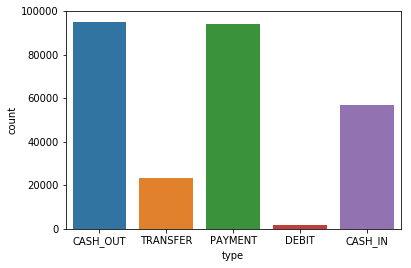

In [10]:
sns.countplot("type", data=data)

#### FROM THE ABOVE GRAPH WE CAN INFER, THE USAGE OF DIFFERENT TYPES OF TRANSACTIONS.

In [11]:
data.describe(include='Float64')

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,2.710680e+05,2.710680e+05,2.710680e+05,2.710680e+05,2.710680e+05
mean,1.831131e+05,8.833474e+05,8.973393e+05,9.662371e+05,1.198033e+06
std,3.397514e+05,2.826180e+06,2.860810e+06,2.361088e+06,2.598825e+06
min,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.297726e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.846952e+04,1.880705e+04,0.000000e+00,7.898391e+04,1.860065e+05
75%,2.344312e+05,1.866821e+05,2.198601e+05,8.380756e+05,1.242617e+06
max,1.000000e+07,3.890000e+07,3.890000e+07,4.130000e+07,4.140000e+07


#### DETECTING OUTLIERS

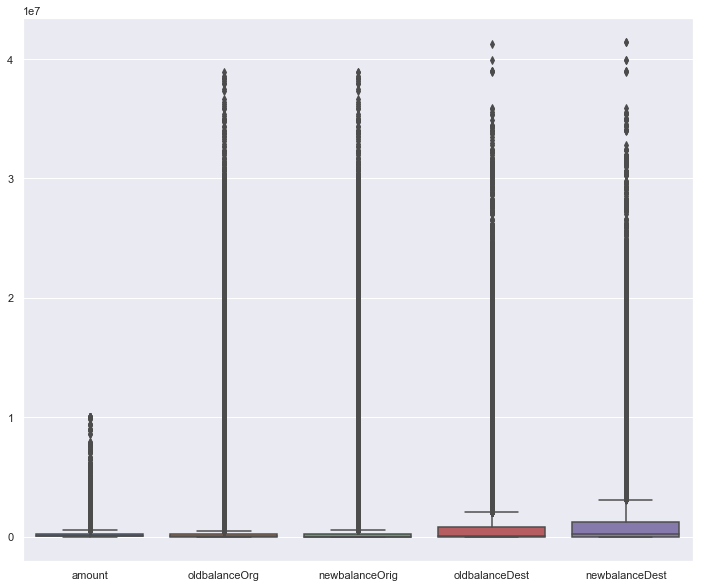

In [12]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(data= data.iloc[:,2:7])

#### HAVING OUTLIERS IS THE NATURE OF THE VARIABLE IN THIS CASE, SO WE ARENT ELIMINATING ARE COMPLETELY CAPING THE OUTLIERS.WE ARE JUST ADDRESSING THE VERY EXTREME VALUES.

In [13]:
out3=data.oldbalanceDest >=39000000
column_name = 'oldbalanceDest'
data.loc[out3,column_name]=36000000

out4=data.newbalanceDest>=39000000
column_name = 'newbalanceDest'
data.loc[out4,column_name]=36000000

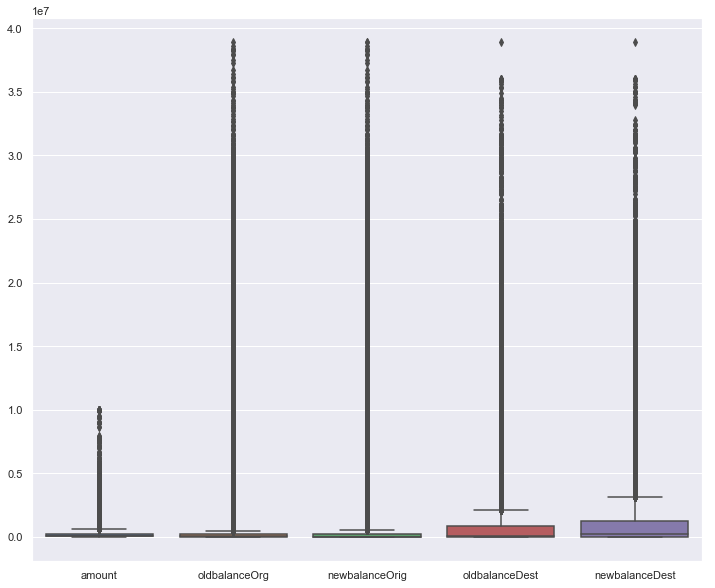

In [14]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(data= data.iloc[:,2:7])

#### CHECK THE CLASS DISTRIBUTION IN THE CATEGORICAL DEPENDENT VARIABLE OF OUR DATASET.

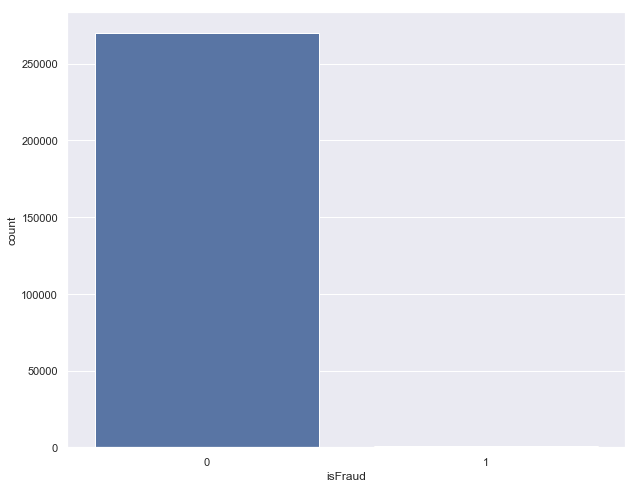

In [15]:
#LETS CHECK THE CLASS DISTRIBUTION
plt.figure(figsize=(10,8))
sns.countplot(data.isFraud)

#### CALCULATING THE PERCENTAGE OF CLASS DISTRIBUTION IN THE DEPENDENT VARIABLE

In [16]:
count_normal_transaction = len(data[data["isFraud"]==0])
count_fraud_transaction=len(data[data["isFraud"]==1])

percentage_normal = count_normal_transaction/(count_normal_transaction+count_fraud_transaction)
percentage_fraud = count_fraud_transaction/(count_normal_transaction+count_fraud_transaction)

print("percentage of normal transaction is",percentage_normal*100)
print("percentage of fraud transaction is",percentage_fraud*100)

percentage of normal transaction is 99.58165478772854
percentage of fraud transaction is 0.41834521227145954


#### FROM THIS IT IS CLEARY EVIDENT THAT THE DATASET IS COMPLETELY IMBALANCED

#### IDENTIFYING THE AMOUNT RELATED TO THE TRANSACTION

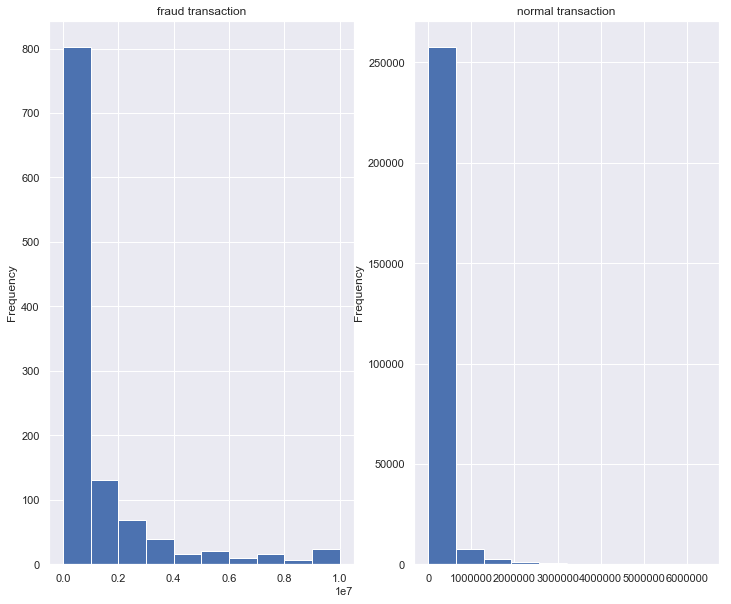

In [17]:
fraud_transaction = data[data["isFraud"]==1]
normal_transaction =data[data["isFraud"]==0]

plt.figure(figsize=(12,10))
plt.subplot(121)
fraud_transaction.amount.plot.hist(title = "fraud transaction")
plt.subplot(122)
normal_transaction.amount.plot.hist(title = "normal transaction")

#### SEPERATE THE TARGET VARIABLE FROM THE DATASET

In [18]:

target_data = data["isFraud"]
data=data.drop(["isFraud"],axis=1)

data.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,CASH_OUT,614317.64,0.00,0.0,4541021.72,3997768.55,1
1,1,CASH_OUT,416001.33,0.00,0.0,102.00,9291619.62,1
2,1,CASH_OUT,361980.67,0.00,0.0,6057072.17,6453430.91,1
3,1,TRANSFER,235238.66,235238.66,0.0,0.00,0.00,1
4,1,CASH_OUT,235238.66,235238.66,0.0,0.00,235238.66,1


#### CHECKING THE MULTICOLLINEARITY.

In [19]:
d = pd.DataFrame(data=data,columns=list(data.iloc[:,2:8]))

In [20]:
d.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
amount,1.000000,0.001639,-0.022945,0.192013,0.309745,0.443457
oldbalanceOrg,0.001639,1.000000,0.997667,0.092403,0.062762,0.124602
newbalanceOrig,-0.022945,0.997667,1.000000,0.094322,0.060878,0.128766
oldbalanceDest,0.192013,0.092403,0.094322,1.000000,0.958617,0.272626
newbalanceDest,0.309745,0.062762,0.060878,0.958617,1.000000,0.314288
isFlaggedFraud,0.443457,0.124602,0.128766,0.272626,0.314288,1.000000


#### VISUALISING THE MULTICOLLINEARITY USING HEATMAP

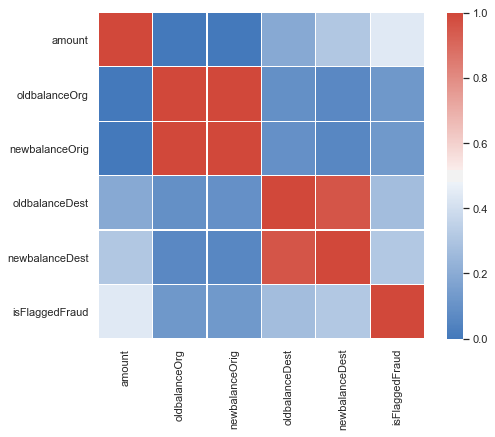

In [21]:
cor = d.corr()
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(250, 15, as_cmap=True) #related to colour shades
sns.heatmap(cor ,vmin = 0,vmax =1,cmap=cmap , square = True,linewidths=.25)

#### CHECKING THE MULTICOLLINEARITY USING VIF[VARIANCE INFLATION FACTOR]

In [22]:
vif=pd.DataFrame()
vif["Vif Factor"] = [variance_inflation_factor(d.values,i) for i in range(d.shape[1])]
vif["features"] = d.columns

In [23]:
vif.round(1)

,Vif Factor,features
0,2.3,amount
1,291.6,oldbalanceOrg
2,293.7,newbalanceOrig
3,17.3,oldbalanceDest
4,18.9,newbalanceDest
5,2.1,isFlaggedFraud


#### From all the above three methods which we have used to check the multicollinearity,It is evident that 'oldbalanceOrg' and 'newbalanceOrig' , 'oldbalanceDest' and 'newbalanceDest' are corelated.

#### As we have very less number of features,they are contributing together to predict our D.V . So we aren't eliminating any of them.

In [24]:
data.shape

(271068, 8)

#### CONVERTING CATEGORICAL VARIABLES PRESENT IN THE DATA SET INTO MODEL UNDERSTANDABLE

In [25]:
labelencoder=LabelEncoder()
data['type']=labelencoder.fit_transform(data['type'])

In [26]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,1,614317.64,0.00,0.0,4541021.72,3997768.55,1
1,1,1,416001.33,0.00,0.0,102.00,9291619.62,1
2,1,1,361980.67,0.00,0.0,6057072.17,6453430.91,1
3,1,4,235238.66,235238.66,0.0,0.00,0.00,1
4,1,1,235238.66,235238.66,0.0,0.00,235238.66,1


#### SPLITTING THE TRAIN AND TEST SET , TO TRAIN AND VALIDATE THE MODEL

In [27]:
x_train,x_test,y_train,y_test = train_test_split(data,target_data,test_size=0.3,random_state=0)
print("observations in x_train",x_train.shape)
print("observations in y_train",y_train.shape)
print("observations in x_test",x_test.shape)
print("observations in x_train",y_test.shape)

observations in x_train (189747, 8)
observations in y_train (189747,)
observations in x_test (81321, 8)
observations in x_train (81321,)


#### WE HAVE IDENTIFIED THE DATA IS IMBALANCED,THE MODEL TRAINED WITH IMBALNCED DATA DOESNT GIVE ACCURATE RESULTS FOR UNSEEN DATA.SO WE HAVE TO BALANCE THE DATA USING RESAMPLING TECHNIQUES.

#### SO ONE SUCH RESAMPLING TECHNIQUE WE HAVE USED HERE IS SMOTEEN[WHICH DOES BOTH OVER AND UNDER SAMPLING]

In [28]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN 
smo = SMOTEENN(sampling_strategy='all',random_state = 0,ratio=1)             #,ratio=0.6)
x_train_res,y_train_res = smo.fit_sample(x_train,y_train)


#### THE CLASS DISTRIBUTION IN TRAINING DATA BEFORE SMOTE

In [29]:
y_train.value_counts()  

0    188967
1       780
Name: isFraud, dtype: int64

#### THE CLASS DISTRIBUTION IN TRAINING DATA AFTER SMOTE

In [30]:
np.bincount(y_train_res)

array([185349, 188002])

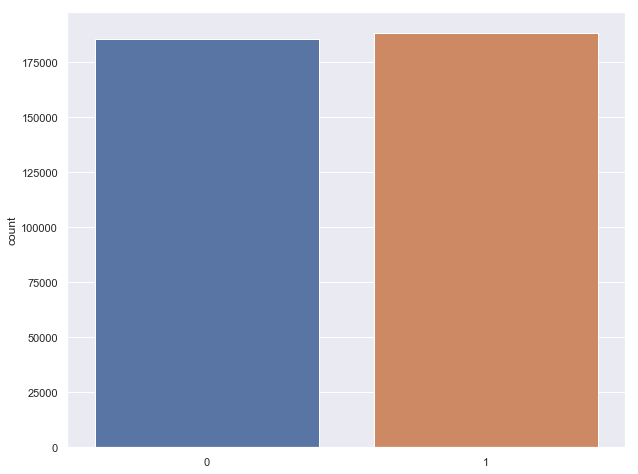

In [31]:
#LETS CHECK THE CLASS DISTRIBUTION NOW
plt.figure(figsize=(10,8))
sns.countplot(y_train_res)

In [32]:
print(y_train_res.shape)
print(x_train_res.shape)

(373351,)
(373351, 8)


### BUILDING THE LOGISTIC REGRESSION MODEL.


##### HERE WE PASS THE TRAIN DATA INTO THE LOGISTIC REGRESSION MODEL


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

smote_logreg = LogisticRegression()
smote_logreg = smote_logreg.fit(x_train_res,y_train_res)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### LOGISTIC REGRESSION MODEL COEFFICIENTS.

In [34]:
smote_logreg.coef_

array([[ 2.27298109e-07, -1.35313333e-08, -1.70183650e-05,
         4.07860672e-05, -6.57187283e-05,  9.51788906e-07,
        -1.14201391e-06, -5.24997700e-10]])

#### LOGISTIC REGRESSION MODEL INTERCEPT VALUE

In [35]:
smote_logreg.intercept_

array([-5.11352492e-09])

#### CALCULATING THE ACCURACY OF MODEL BY PASSING THE TEST DATA

In [36]:
print('Accuracy of logistic regression model on validation set: {:.2f}'.format(smote_logreg.score(x_test, y_test)))

Accuracy of logistic regression model on validation set: 0.92


#### PREDICTING THE DEPENDENT VARIABLE VALUES VALUES BY PASSING ONLY INDEPENDENT VARIABLES OF TEST DATA

In [37]:
smote_ypred = smote_logreg.predict(x_test)
smote_ypred

array([0, 0, 0, ..., 0, 0, 0])

#### BUILDING THE CONFUSION MATRIX BY PASSING THE ACTUAL TEST VALUES AND PREDICTED TEST VALUES

In [38]:
cm = confusion_matrix(y_test,smote_ypred)
print(cm)

[[74496  6471]
 [   11   343]]


#### VISUALISING THE CONFUSION MATRIX

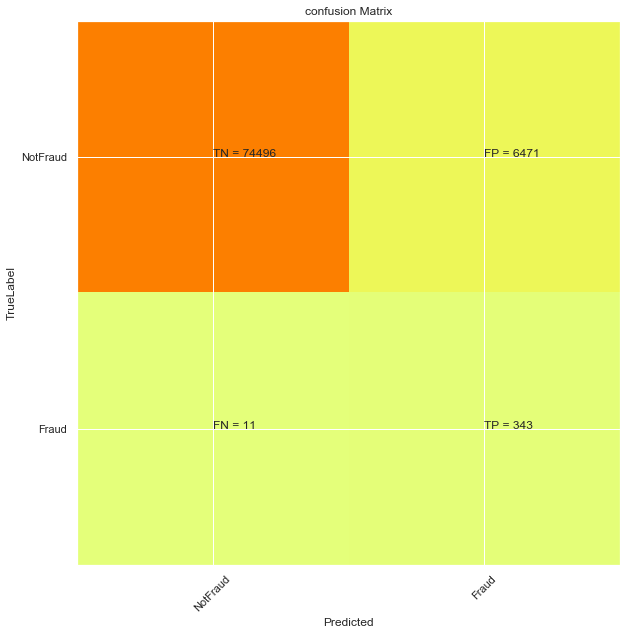

In [39]:
plt.clf()
plt.imshow(cm,cmap = plt.cm.Wistia)
classNames = ['NotFraud','Fraud']
plt.title('confusion Matrix')
plt.ylabel('TrueLabel')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))

plt.show()

#### PRINTING THE CLASSIFICATION REPORT BASED ON ACTUAL TEST VALUES AND PRREDICTED VALUES

In [40]:
print(classification_report(y_test,smote_ypred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     80967
           1       0.05      0.97      0.10       354

   micro avg       0.92      0.92      0.92     81321
   macro avg       0.53      0.94      0.53     81321
weighted avg       1.00      0.92      0.95     81321



#### CALCULATING THE ACCURACY

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,smote_ypred)

0.9202911916971016

#### CALCULATING F1 SCORE

In [42]:
from sklearn.metrics import recall_score
recall_score(y_test,smote_ypred)       

0.9689265536723164

#### CALCULATING MATTEWS CORRELATION COEFFICIENT SCORE

In [43]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test,smote_ypred)

0.21123228954040027

### BUILDING THE RANDOM FOREST CLASSIFIER MODEL

In [44]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [45]:
clf.fit(x_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### PREDICTING THE TEST VALUES BY PASSING I.V'S INTO THE MODEL 

In [50]:
y_pred = clf.predict(x_test)

In [52]:
cm2 = confusion_matrix(y_test,y_pred)
print(cm2)

[[80934    33]
 [   19   335]]


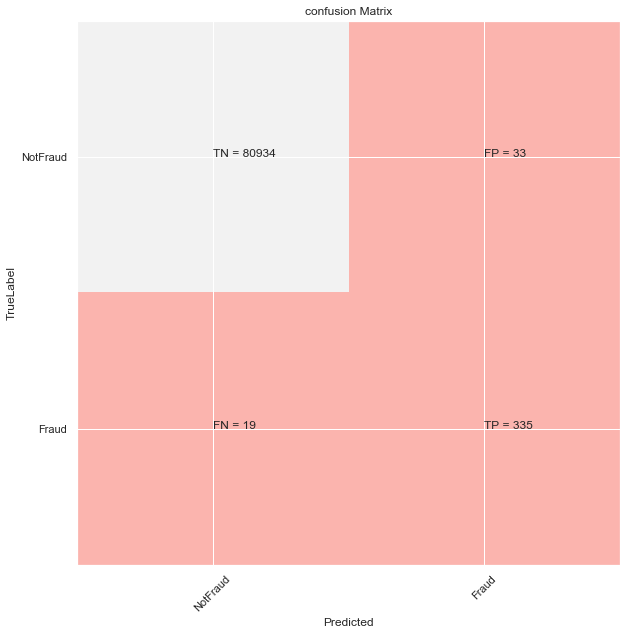

In [87]:
plt.clf()
plt.imshow(cm2,cmap = plt.cm.Pastel1)
classNames = ['NotFraud','Fraud']
plt.title('confusion Matrix')
plt.ylabel('TrueLabel')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm2[i][j]))

plt.show()

#### CALCULATING THE ACCURACY OF MODEL

In [76]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9993605587732566


#### CALCULATING THE FEATURE IMPORTANCE VALUES

In [78]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=data.columns).sort_values(ascending=False)
feature_imp

step              0.452432
oldbalanceOrg     0.150313
newbalanceOrig    0.131763
type              0.103499
amount            0.066896
newbalanceDest    0.043428
oldbalanceDest    0.029441
isFlaggedFraud    0.022230
dtype: float64

#### VISUALISING THE FETURE IMPORTANCE VALUES

No handles with labels found to put in legend.


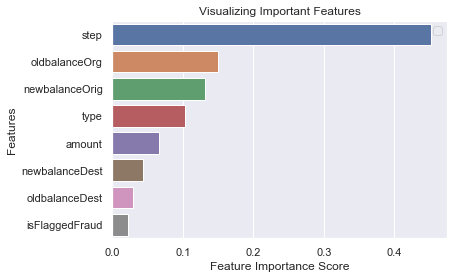

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


#### CALCULATING THE RECALL SCORE

In [81]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)       

0.9463276836158192

#### CALCULATING THE MATTHEWS CORELATION COEFFICIENT VALUES

In [82]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test,y_pred)

0.9278328196065537

#### CALCULATING THE PRECISION SCORE

In [83]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)       

0.9103260869565217

#### CALCULATING THE F1SCORE

In [84]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)       

0.9279778393351801

#### SO FINALLY BY COMPARING  THE EVALUATION METRICS OF BOTH THE MODELS , WE CAN CHOOSE RANDOM FOREST CLASSIFIER AS CHAMPION MODEL.